# Exercises of Lab1 Session

## Sparse categorical crossentropy loss function

It allows us to **not pre-process** the *y* data **and compare the one-hot encoded** output of the model with the actual label of $y_{true}$ vector.
This loss function makes us save memory and computational time, since it only uses one single integer for a class instead of a whole vector.

In [26]:
# First import all the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [27]:
# Also import layers, models and Adam optimizer from keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [28]:
# Load the data and normalize x
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

def normalize_data(x):
  return (x-x.min())/(x.max()-x.min())


x_train = normalize_data(x_train)
x_test = normalize_data(x_test)

In [29]:
# Cell needed to define the build_model function,
# written using the Functional API

def build_model(input_shape, output_shape):

  input = Input(input_shape)
  flatten = Flatten()(input)

  dense_1 = Dense(64, activation='relu')(flatten)
  dense_2 = Dense(output_shape, activation='softmax')(dense_1)

  model = Model(inputs = input, outputs = dense_2)

  model.summary()
  return model


In [30]:
# No need to pre-process the data and compare the one-hot encoded output
# since the Sparse Categorical Crossentropy is going to be used

# Build the model 
d = x_train.shape[-1]
model = build_model((d,d), 10)
model.compile(optimizer = Adam(learning_rate=1e-2), loss = 'sparse_categorical_crossentropy', metrics='accuracy')
history_1 = model.fit(x_train, y_train, batch_size = 128, epochs = 10, validation_split = 0.1)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                50240     
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 2s 4ms/step - loss: 0.5352 - accuracy: 0.8097 - val_loss: 0.4091 - val_accuracy: 0.8522
Epoch 2/10
422/422 [=========================

In [31]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4574 - accuracy: 0.8473


[0.457417368888855, 0.8472999930381775]

In [32]:
def display_history(history):
    mse_training = history.history['loss']
    acc_training = history.history['accuracy']

    mse_val = history.history['val_loss']
    acc_val = history.history['val_accuracy']

    # Visualize the behavior of the loss
    plt.plot(mse_training)
    plt.plot(mse_val)
    plt.grid()
    plt.title('Loss during training')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'])
    plt.show()

    # and of the accuracy
    plt.plot(acc_training)
    plt.plot(acc_val)
    plt.grid()
    plt.title('Accuracy during training')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'])
    plt.show()

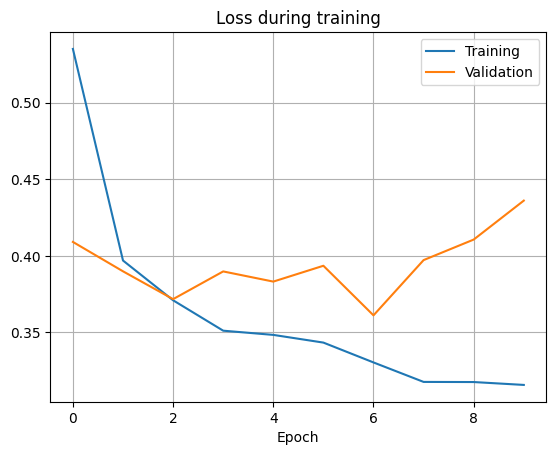

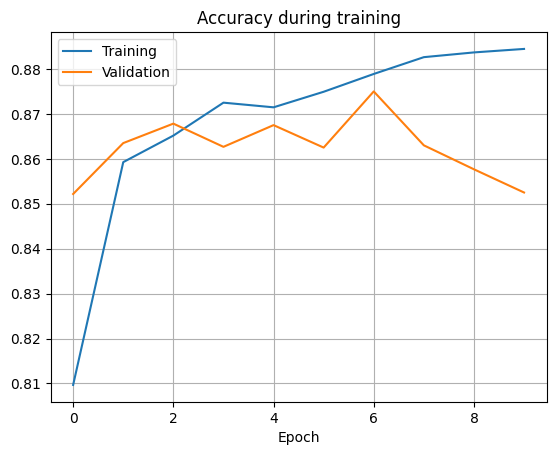

In [33]:
display_history(history_1)

## Callback

Consider learning rate and epochs, two important hyperparameters.
It is possible to exploit the characteristics that make these two great hyperparameters through callbacks, which are algorithms that are automatically executed during training.
 - Learning rate: should be large when starting, and then decresing when the performance doesn't improve anymore.
 - Epochs: if they're too low, the training algorithm doesn't have enough time to converge; while if it is too large, it takes too much time to conclude the training. 
 Thus, it is better to stop the training when the number of epochs is not decreasing anymore.

 Some callbacks are already in Keras. The most common is EarlyStopping, which stops the training if it is useless.

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor="val_loss",
    min_delta=0.01,
    patience=2,
    restore_best_weights=True)

In [35]:
# Load the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#Normalize X
x_train = normalize_data(x_train)
x_test = normalize_data(x_test)

#Reload the model
model = build_model((d, d), 10)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                50240     
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer=Adam(learning_rate=1e-2), loss='sparse_categorical_crossentropy', metrics='accuracy')
history_1 = model.fit(x_train, y_train, batch_size=128, epochs=100, validation_split=0.1, callbacks=[callback])

Epoch 1/100
422/422 [==============================] - 2s 3ms/step - loss: 0.5210 - accuracy: 0.8173 - val_loss: 0.4288 - val_accuracy: 0.8450
Epoch 2/100
422/422 [==============================] - 1s 3ms/step - loss: 0.3964 - accuracy: 0.8590 - val_loss: 0.4101 - val_accuracy: 0.8535
Epoch 3/100
422/422 [==============================] - 1s 3ms/step - loss: 0.3704 - accuracy: 0.8657 - val_loss: 0.3733 - val_accuracy: 0.8622
Epoch 4/100
422/422 [==============================] - 1s 3ms/step - loss: 0.3532 - accuracy: 0.8697 - val_loss: 0.4410 - val_accuracy: 0.8515
Epoch 5/100
422/422 [==============================] - 1s 3ms/step - loss: 0.3440 - accuracy: 0.8749 - val_loss: 0.3909 - val_accuracy: 0.8670


In [37]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4020 - accuracy: 0.8558


[0.4020047187805176, 0.8557999730110168]

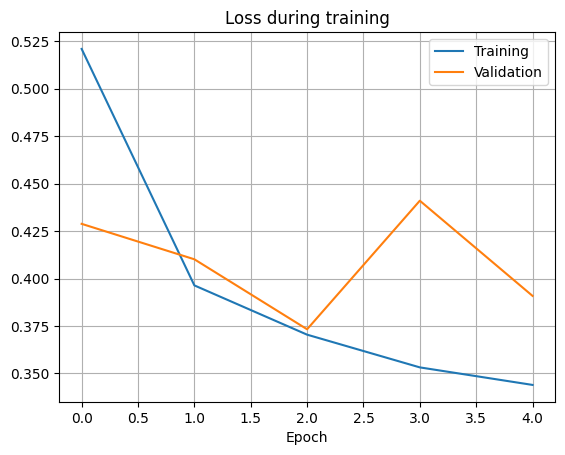

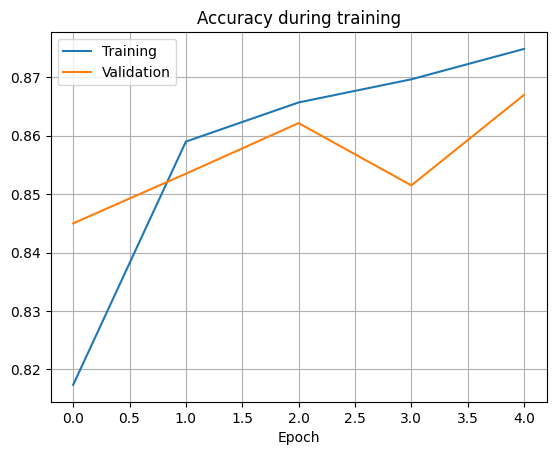

In [38]:
display_history(history_1)

# Hyperparameter Tuning

Hyperparameters are defined by the user, while per Parameters are automatically tuned by the optimizer.


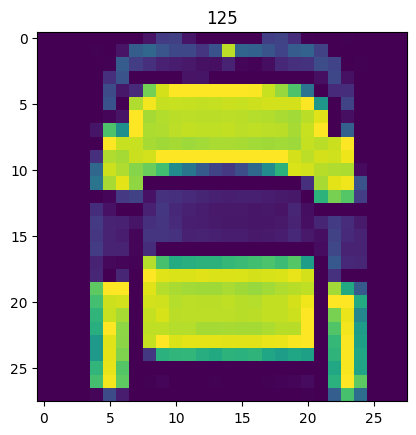

In [39]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow.keras as keras

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Flatten

dataset = tf.keras.datasets.fashion_mnist.load_data()
(x_train, y_train), (x_test, y_test) = dataset

h = random.randint(0,256)

plt.imshow(x_train[h])
plt.title(f'{h}')
plt.show()

normalized = (lambda x: ((x-x.min())/(x.max()-x.min())))

x_train = normalized(x_train)
x_test = normalized(x_test)

In [40]:
# Build model through Functional API

def build_model(input_shape, output_shape):

    input = Input(input_shape)
    flatten = Flatten()(input)
    dense_1 = Dense(units = 128,activation = 'relu')(flatten)
    dense_2 = Dense(output_shape, activation = 'sigmoid')(dense_1)

    model = Model(input, dense_2)
    model.summary()

    return model

In [41]:
model = build_model((x_train.shape[-2], x_train.shape[-2]), 10) #10 labels
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #metrics since it is a classification problem
history_3 = model.fit(x_train, y_train, epochs = 35, batch_size = 150, validation_split = 0.3)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/35
280/280 [==============================] - 2s 4ms/step - loss: 0.6147 - accuracy: 0.7898 - val_loss: 0.4855 - val_accuracy: 0.8289
Epoch 2/35
280/280 [=======================

In [42]:
# Model evaluation
accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3808 - accuracy: 0.8844


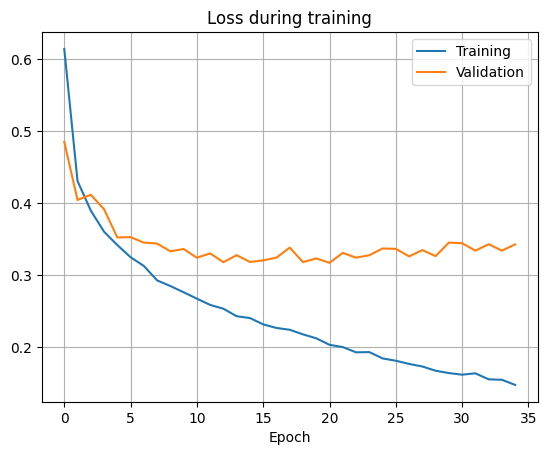

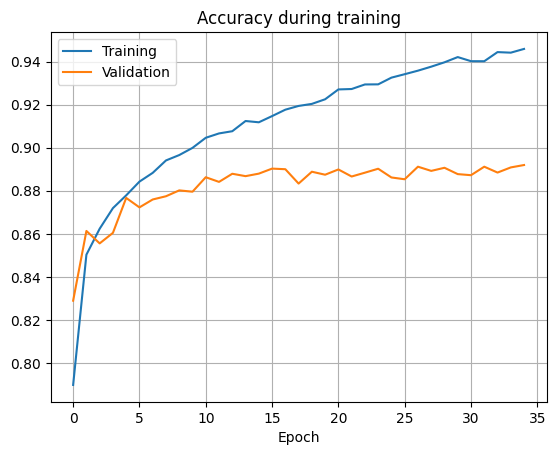

In [43]:
display_history(history_3)